## Importado de librerias

In [ ]:
import auxiliary_fun
import Dacquisition
import DprepNcleaning
import eda
import Mbuilding
import dtale
from termcolor import colored
import seaborn as sns
import matplotlib.pyplot as plt 

## 1: Adquisición de Datos

In [ ]:
data = Dacquisition.d_acquisition(0)

# 2: Selección de Variable Diana

In [ ]:
data, target_column, target_type, scewed_target_col = Dacquisition.var_acquisition(data, 4, CHECK=False) #tema de dataNaN y dataCLEAN juntar

Target column is: Tipo_salida



# 3: Casteo de Datos

In [ ]:
data, rosseta = auxiliary_fun.d_cast(data, target_column)

   Edad  Sexo  Tipo_obesidad  BMI_basal  Tipo_salida  Creat_Basal  FG_Basal  \
0    80     2              3  48.888889          0.0         3.65      11.0   
1    69     2              3  47.363999          0.0         2.51      19.0   
2    65     2              3  45.843645          1.0         3.81      12.0   
3    79     2              3  45.013850          0.0         2.87      15.0   
4    44     2              3  44.531250          1.0         3.91      13.0   

   RAC_Basal  ProtCreat_Basal  Hb_Basal  IST_Basal  Urico_Basal  ColT_Basal  \
0       85.0              NaN      12.5       14.2          7.3       115.0   
1      399.0            922.0      11.9       12.0          4.4       138.0   
2        NaN          12442.0      11.1       15.5          7.6       175.0   
3     1163.0           2107.0      11.8       18.9          6.1       138.0   
4      401.0            729.0      12.6       18.3          7.5       111.0   

   LDL_Basal  TG_Basal  Alb_Basal  Ca_Basal  P_Bas

# 4: Limpieza de Datos

In [ ]:
data, drop_col, drop_row = DprepNcleaning.data_cleaning(data, min_porcentage_col = 10, min_porcentage_row = 0)
print(colored('\nThe result of the number of patients is: '+str(len(data)), 'red', attrs=['bold']))


Resultado de Data Cleaning:
  Cantidad de columnas eliminadas: 2 of 19 (10.53%)
  Cantidad de filas eliminadas: 72 of 224 (32.14%)

The result of the number of patients is: 152


# 5: Análizis Exploratorio de Datos

In [ ]:
    ### Exploratory Data Analyzis (MANUAL)###
manualEDA, missing4rows = eda.ManualEDAfun(data) #data no tiene a predicted column
print(colored('\nTable with information of the variables:', 'red', attrs=['bold']))
print(colored(manualEDA, 'red'))
print(colored('\nTable with information of the rows:', 'red', attrs=['bold']))
print(colored(missing4rows, 'red'))

    ### Exploratory Data Analyzis (AUTO)###
data_decasted_aux = auxiliary_fun.de_cast_PREDICTION(data, data.columns, rosseta)  
dtale.show(data_decasted_aux) #hacerle decast !!!!!
dtale.show(open_browser=True)


Table with information of the variables:
      Column name  Distinct  Distinct (%)  Missing  Missing (%)  Zeros  \
0            Edad        47     30.921053        0            0      0   
1            Sexo         2      1.315789        0            0     86   
2   Tipo_obesidad         3      1.973684        0            0      0   
3     Tipo_salida         2      1.315789        0            0     40   
4     Creat_Basal       126     82.894737        0            0      0   
5        FG_Basal        16     10.526316        0            0      0   
6       RAC_Basal       146     96.052632        0            0      0   
7        Hb_Basal        59     38.815789        0            0      0   
8       IST_Basal       115     75.657895        0            0      0   
9     Urico_Basal        66     43.421053        0            0      0   
10     ColT_Basal        88     57.894737        0            0      0   
11      LDL_Basal        90     59.210526        0            0      0

c:\Users\tomas\TESISS\auxiliary_fun.py:115: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'True' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

c:\Users\tomas\TESISS\auxiliary_fun.py:115: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'False' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



# Entrenamiento de Modelos

c:\Users\tomas\TESISS\Mbuilding.py:197: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

c:\Users\tomas\TESISS\Mbuilding.py:198: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.




Table with information of scores of the models:
   Target column Taget type              Model name Normalization method  \
0    Tipo_salida    boolean  RandomForestClassifier                   No   
38   Tipo_salida    boolean    KNeighborsClassifier                   No   
36   Tipo_salida    boolean  RandomForestClassifier                   No   
4    Tipo_salida    boolean  RandomForestClassifier                   No   
5    Tipo_salida    boolean      LogisticRegression                   No   
28   Tipo_salida    boolean  RandomForestClassifier                   No   
30   Tipo_salida    boolean    KNeighborsClassifier                   No   
29   Tipo_salida    boolean      LogisticRegression                   No   
12   Tipo_salida    boolean  RandomForestClassifier                   No   
24   Tipo_salida    boolean  RandomForestClassifier                   No   
26   Tipo_salida    boolean    KNeighborsClassifier                   No   
13   Tipo_salida    boolean      Logist

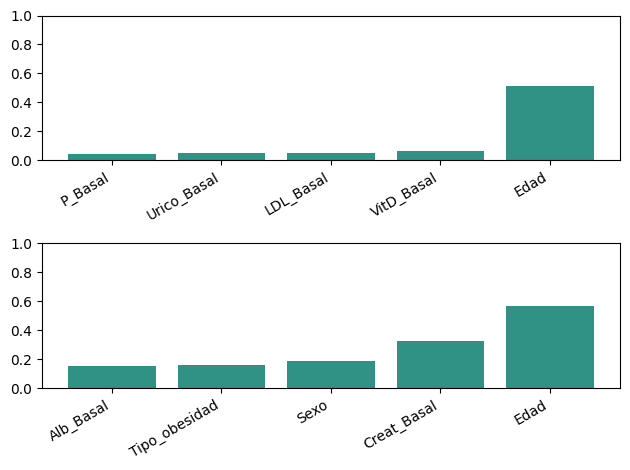

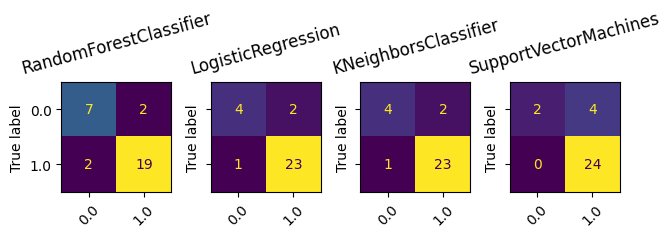

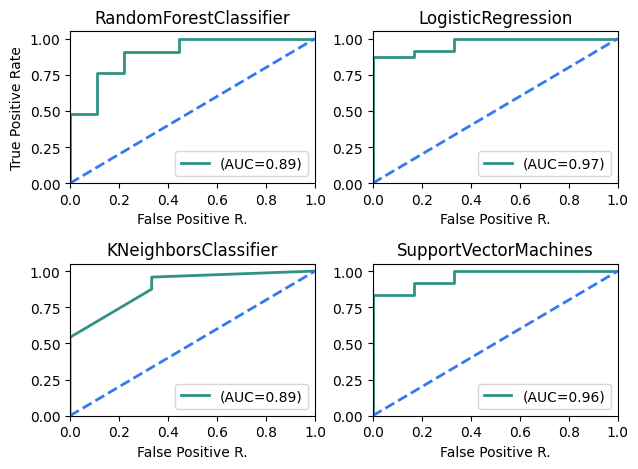

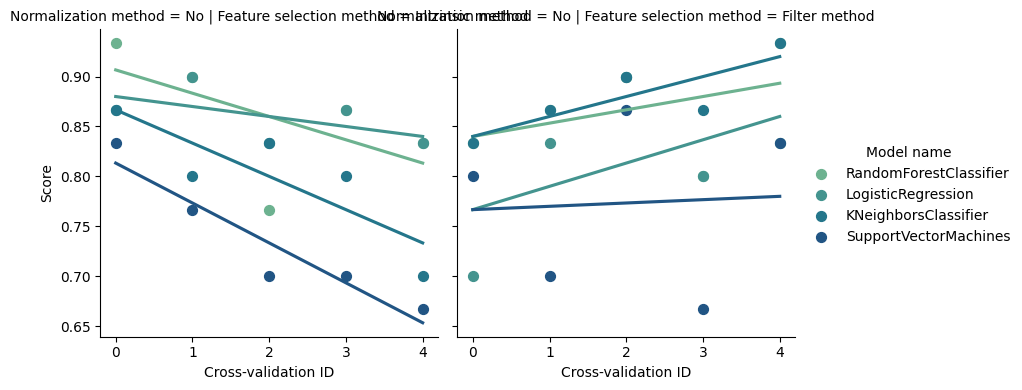

In [ ]:
    ### Step 5: Model Building       
model_info, trained_models, fig1, fig2, fig3 = Mbuilding.model_shake(DATA=data, TARGET_COLUMN=target_column, TARGET_TY=target_type)
# model_return, ALL_TRAINED_MODELS, figure_features, fig_ROC, figure_CM
sns.lmplot(
    data=model_info, x="Cross-validation ID", y="Score", row="Normalization method", col="Feature selection method", hue='Model name',
    palette="crest", ci=None,
    height=4, scatter_kws={"s": 50, "alpha": 1}
)
plt.show()

In [3]:
from alive_progress import alive_bar
import time

# for x in 1000, 1500, 700, 0:
#    with alive_bar(x) as bar:
#        for i in range(1000):
#            time.sleep(.005)
#            bar()

with alive_bar(1000) as bar:
    for i in range(1000):
        time.sleep(.005)
        bar()

|████████████████████████████████████████| 1000/1000 [100%] in 5.4s (184.21/s) 
